In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
sns.set_context("talk")
plt.rcParams["pdf.fonttype"] = 42

In [3]:
data_path = "../MicroSPLIT-data/C2_transcriptional_regulators/C2_non_log_transformed.h5ad"
adata = sc.read_h5ad(data_path)
adata

AnnData object with n_obs × n_vars = 13541 × 4211
    obs: 'wells', 'sample', 'n_counts', 'n_genes', 'CRISPR_perturbation'
    var: 'gene_ids', 'feature_types', 'n_counts'
    uns: 'CRISPR_perturbation_colors', 'sample_colors'

In [4]:
adata.layers["log_transformed"] = np.log1p(adata.X)

In [5]:
adata.var

,gene_ids,feature_types,n_counts
thrL,b0001,Gene Expression,144.500
thrA,b0002,Gene Expression,1494.375
thrB,b0003,Gene Expression,651.750
thrC,b0004,Gene Expression,846.750
yaaX,b0005,Gene Expression,33.000
...,...,...,...
creC,b4399,Gene Expression,90.000
creD,b4400,Gene Expression,32.000
arcA,b4401,Gene Expression,2815.750
yjjY,b4402,Gene Expression,71.125


In [6]:
adata.obs

,wells,sample,n_counts,n_genes,CRISPR_perturbation
AGCCATGC_AAACATCG_AATAGAAC,77,Pool,71.125000,73,poxB
ATCCTGTA_AAACATCG_AATAGAAC,77,Pool,86.809525,65,tyrR
CCTAATCC_AAACATCG_AATAGAAC,77,Pool,50.619049,48,tyrR
AAGAGATC_AACAACCA_AATAGAAC,77,Pool,63.761894,64,poxB
GTCGTAGA_AACAACCA_AATAGAAC,77,Pool,115.458328,99,aroL
...,...,...,...,...,...
TGAAGAGA_TTCACGCA_TTCGCTAC,33,fadR,118.809525,91,fadR
TGGCTTCA_TTCACGCA_TTCGCTAC,33,fadR,123.666672,95,fadR
ACGTATCA_AGTCACTA_TTTGCAAC,107,tyrR,37.999992,37,tyrR
TGAAGAGA_CAGATCTG_TTTGCAAC,107,tyrR,57.999992,53,tyrR


In [7]:
adata.obs["CRISPR_perturbation"].unique()

['poxB', 'tyrR', 'aroL', 'fadR', 'lacI', 'AAV.2', 'AAV', 'MG1655']
Categories (8, object): ['AAV', 'AAV.2', 'MG1655', 'aroL', 'fadR', 'lacI', 'poxB', 'tyrR']

In [8]:
df = adata.to_df()
df

,thrL,thrA,thrB,thrC,yaaX,yaaA,yaaJ,talB,mog,satP,...,yjjX,ytjC,rob,creA,creB,creC,creD,arcA,yjjY,yjtD
AGCCATGC_AAACATCG_AATAGAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATCCTGTA_AAACATCG_AATAGAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCTAATCC_AAACATCG_AATAGAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGAGATC_AACAACCA_AATAGAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTCGTAGA_AACAACCA_AATAGAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGAAGAGA_TTCACGCA_TTCGCTAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGGCTTCA_TTCACGCA_TTCGCTAC,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ACGTATCA_AGTCACTA_TTTGCAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGAAGAGA_CAGATCTG_TTTGCAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
(df > 0).sum()

thrL     57
thrA    558
thrB    274
thrC    336
yaaX     11
       ... 
creC     39
creD     16
arcA    946
yjjY     21
yjtD    120
Length: 4211, dtype: int64

<Axes: ylabel='Count'>

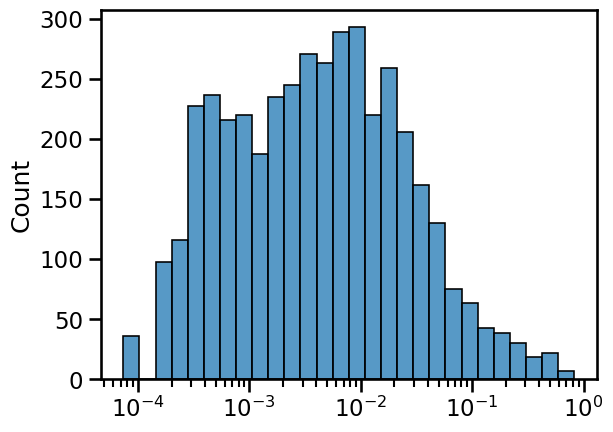

In [22]:
# x: cell fraction
# y: gene count
sns.histplot(
    ((df > 0).sum(0) + 1) / df.shape[0],
    log_scale=True,
)

[Text(0.5, 0, 'gene fraction detected per cell')]

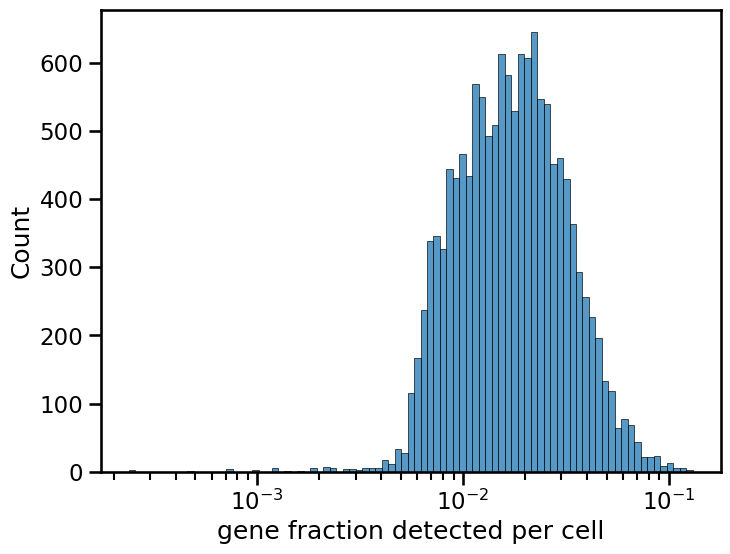

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot((df > 0).sum(1) / df.shape[1], log_scale=True, ax=ax)
ax.set(xlabel="Gene fraction captured per cell")

<Axes: >

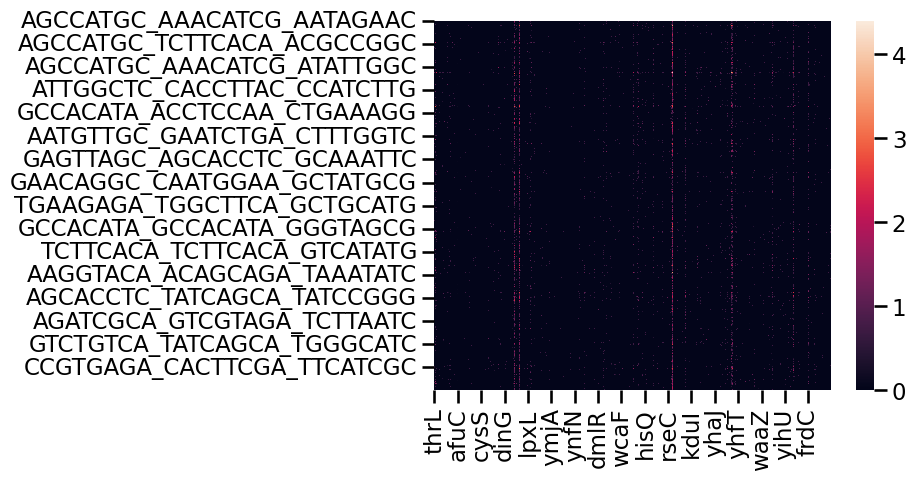

In [17]:
sns.heatmap(df.apply(np.log1p))

In [66]:
df = pd.concat([df, adata.obs["CRISPR_perturbation"]], axis=1)
df

,thrL,thrA,thrB,thrC,yaaX,yaaA,yaaJ,talB,mog,satP,...,ytjC,rob,creA,creB,creC,creD,arcA,yjjY,yjtD,CRISPR_perturbation
AGCCATGC_AAACATCG_AATAGAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,poxB
ATCCTGTA_AAACATCG_AATAGAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tyrR
CCTAATCC_AAACATCG_AATAGAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tyrR
AAGAGATC_AACAACCA_AATAGAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,poxB
GTCGTAGA_AACAACCA_AATAGAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,aroL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGAAGAGA_TTCACGCA_TTCGCTAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fadR
TGGCTTCA_TTCACGCA_TTCGCTAC,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,fadR
ACGTATCA_AGTCACTA_TTTGCAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tyrR
TGAAGAGA_CAGATCTG_TTTGCAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tyrR


In [112]:
def plot_2Dhist(df, regulator, target):
    data = df[(df[regulator] > 0) | (df[target] > 0)]
    g = sns.FacetGrid(data, col="CRISPR_perturbation", height=5, col_wrap=4)
    g.map(
        sns.histplot,
        regulator,
        target,
        discrete=True,
        cbar=True,
    )

# LacI on LacZ

In [89]:
regulator = "lacI"
target = "lacZ"
np.log10(df[[regulator, target]].value_counts())

lacI  lacZ   
0.0   0.00000    4.121593
      1.00000    2.278754
1.0   0.00000    1.875061
0.0   2.00000    1.531479
      3.00000    0.903090
      1.14286    0.000000
      9.00000    0.000000
1.0   1.00000    0.000000
dtype: float64

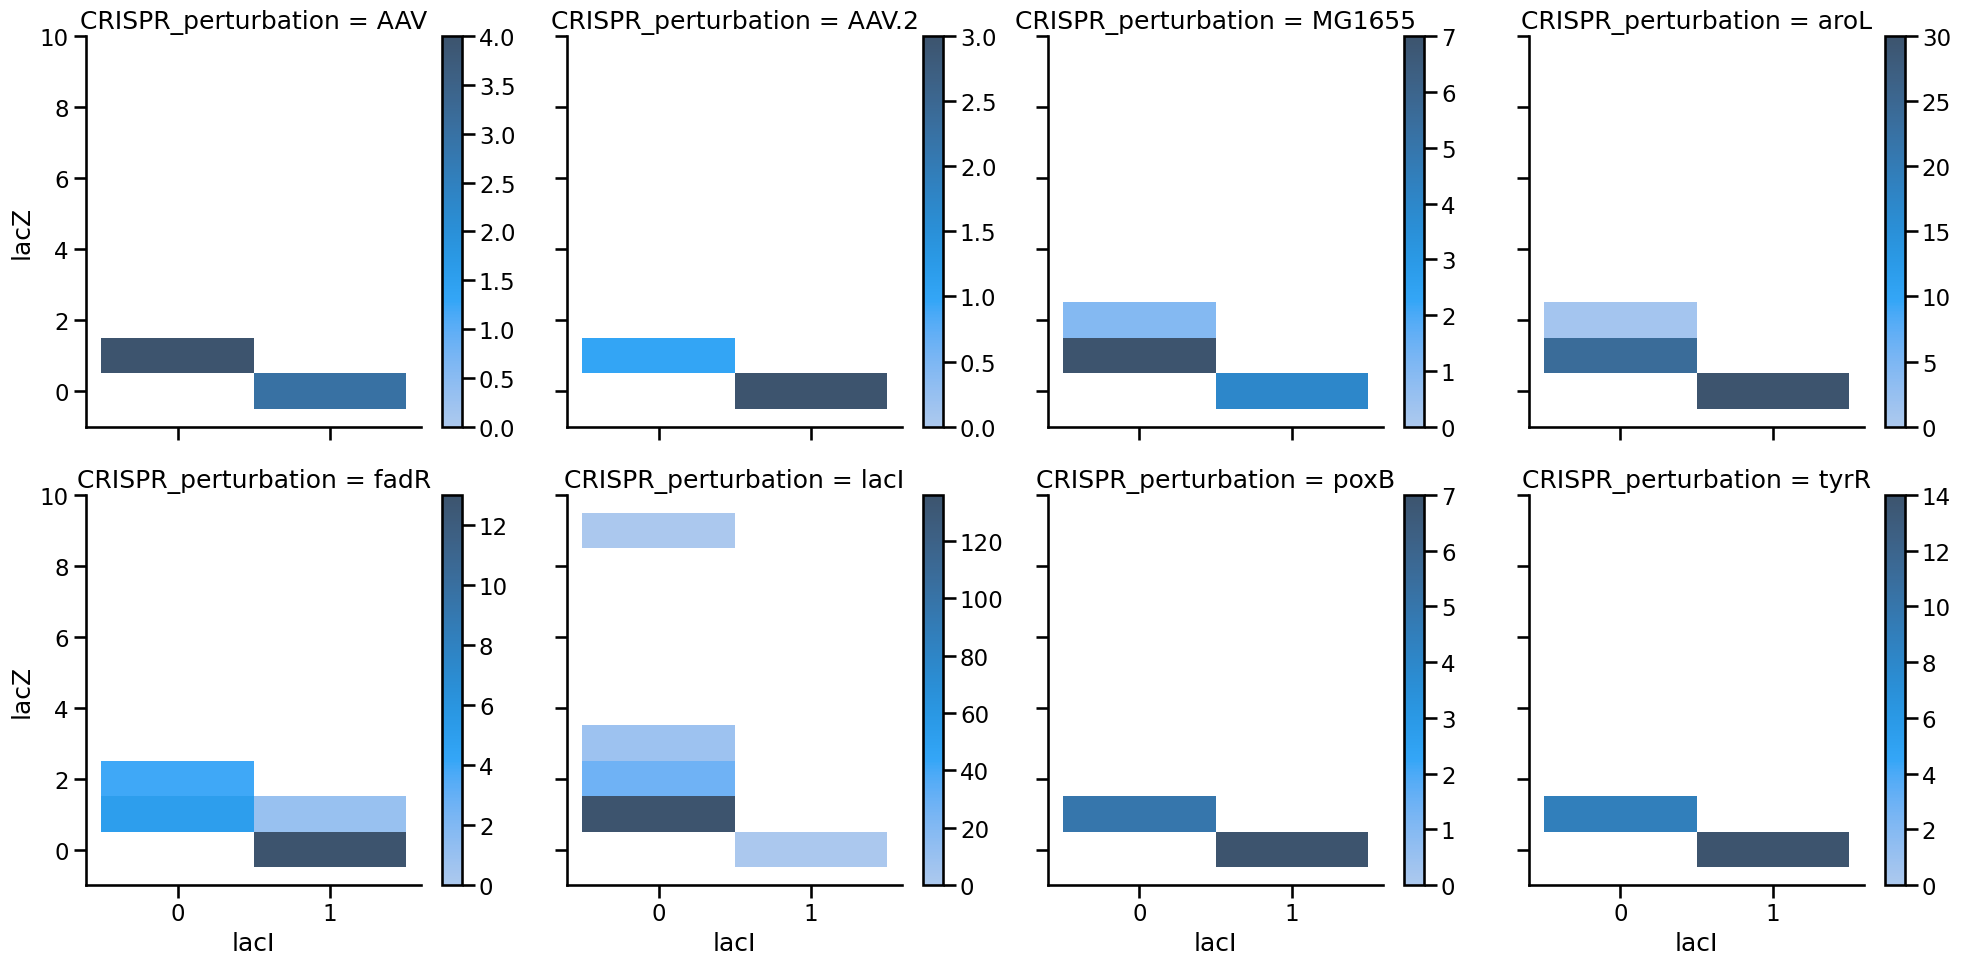

In [108]:
regulator = "lacI"
target = "lacZ"
plot_2Dhist(df, regulator, target)

# TyrR regulon

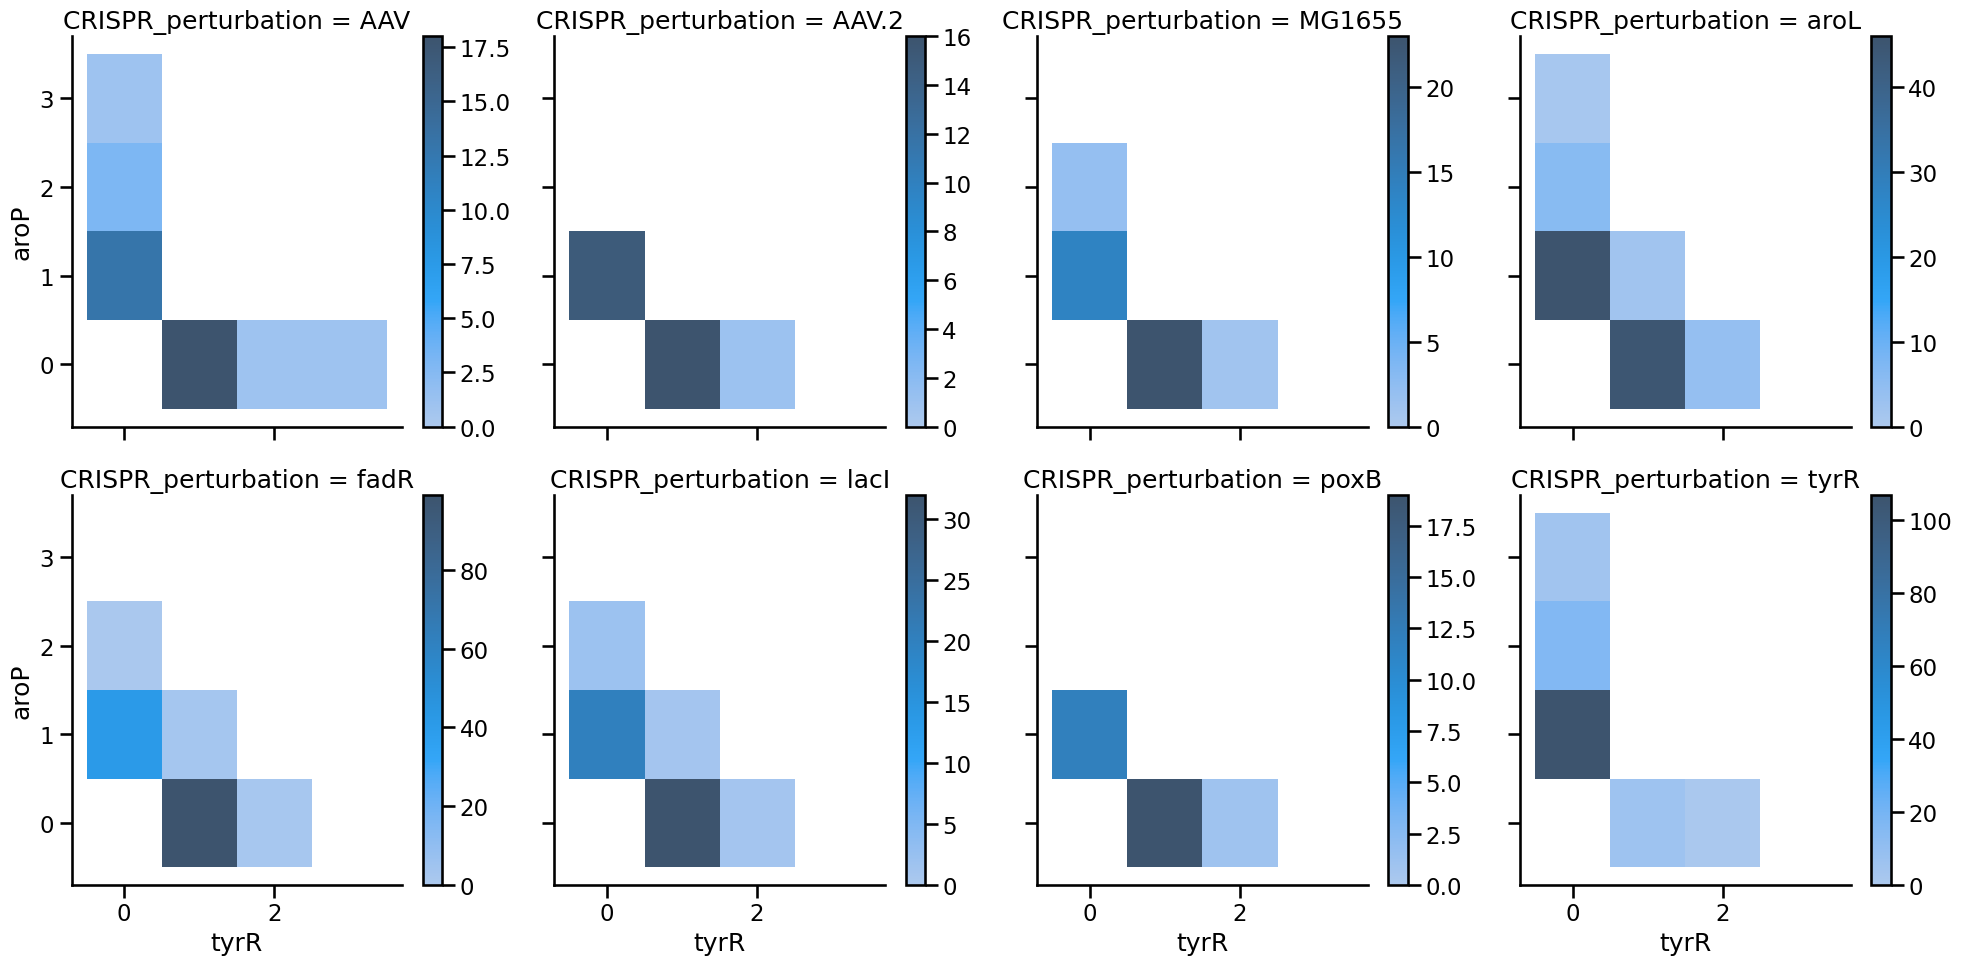

In [109]:
regulator = "tyrR"
target = "aroP"
plot_2Dhist(df, regulator, target)

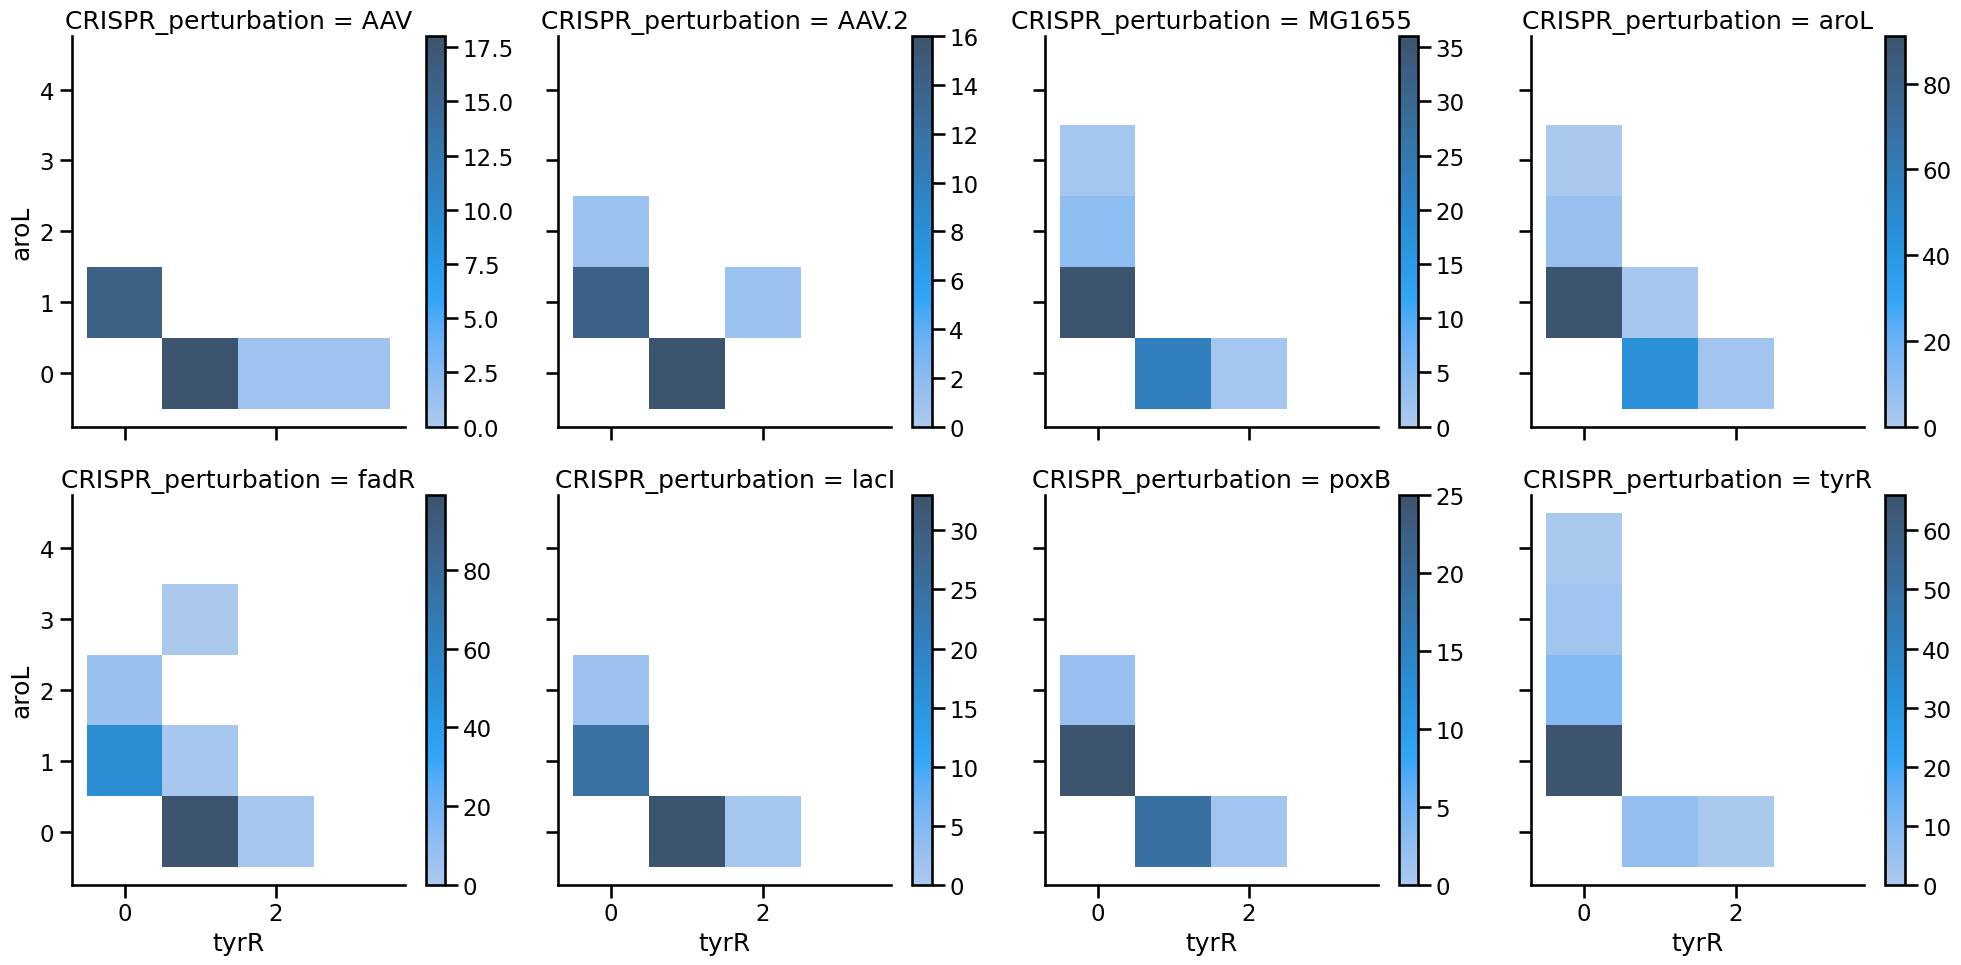

In [114]:
regulator = "tyrR"
target = "aroL"
plot_2Dhist(df, regulator, target)

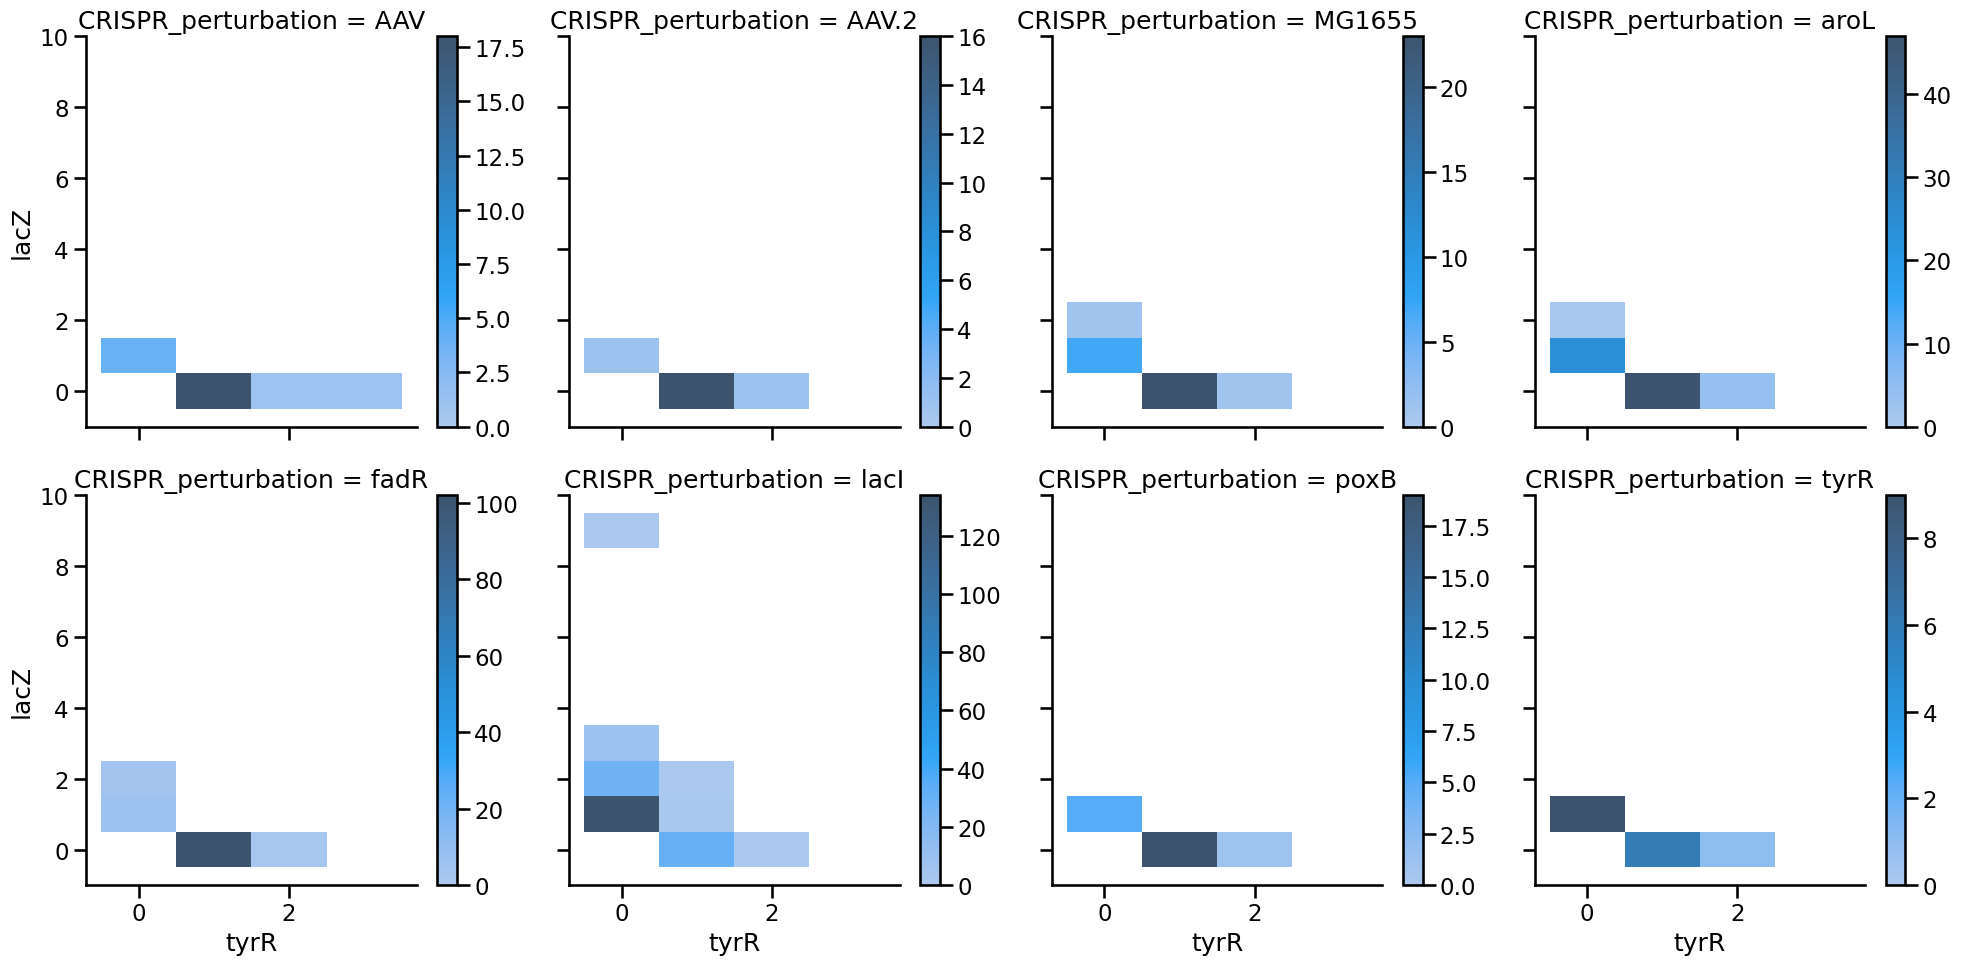

In [110]:
regulator = "tyrR"
target = "lacZ"
plot_2Dhist(df, regulator, target)

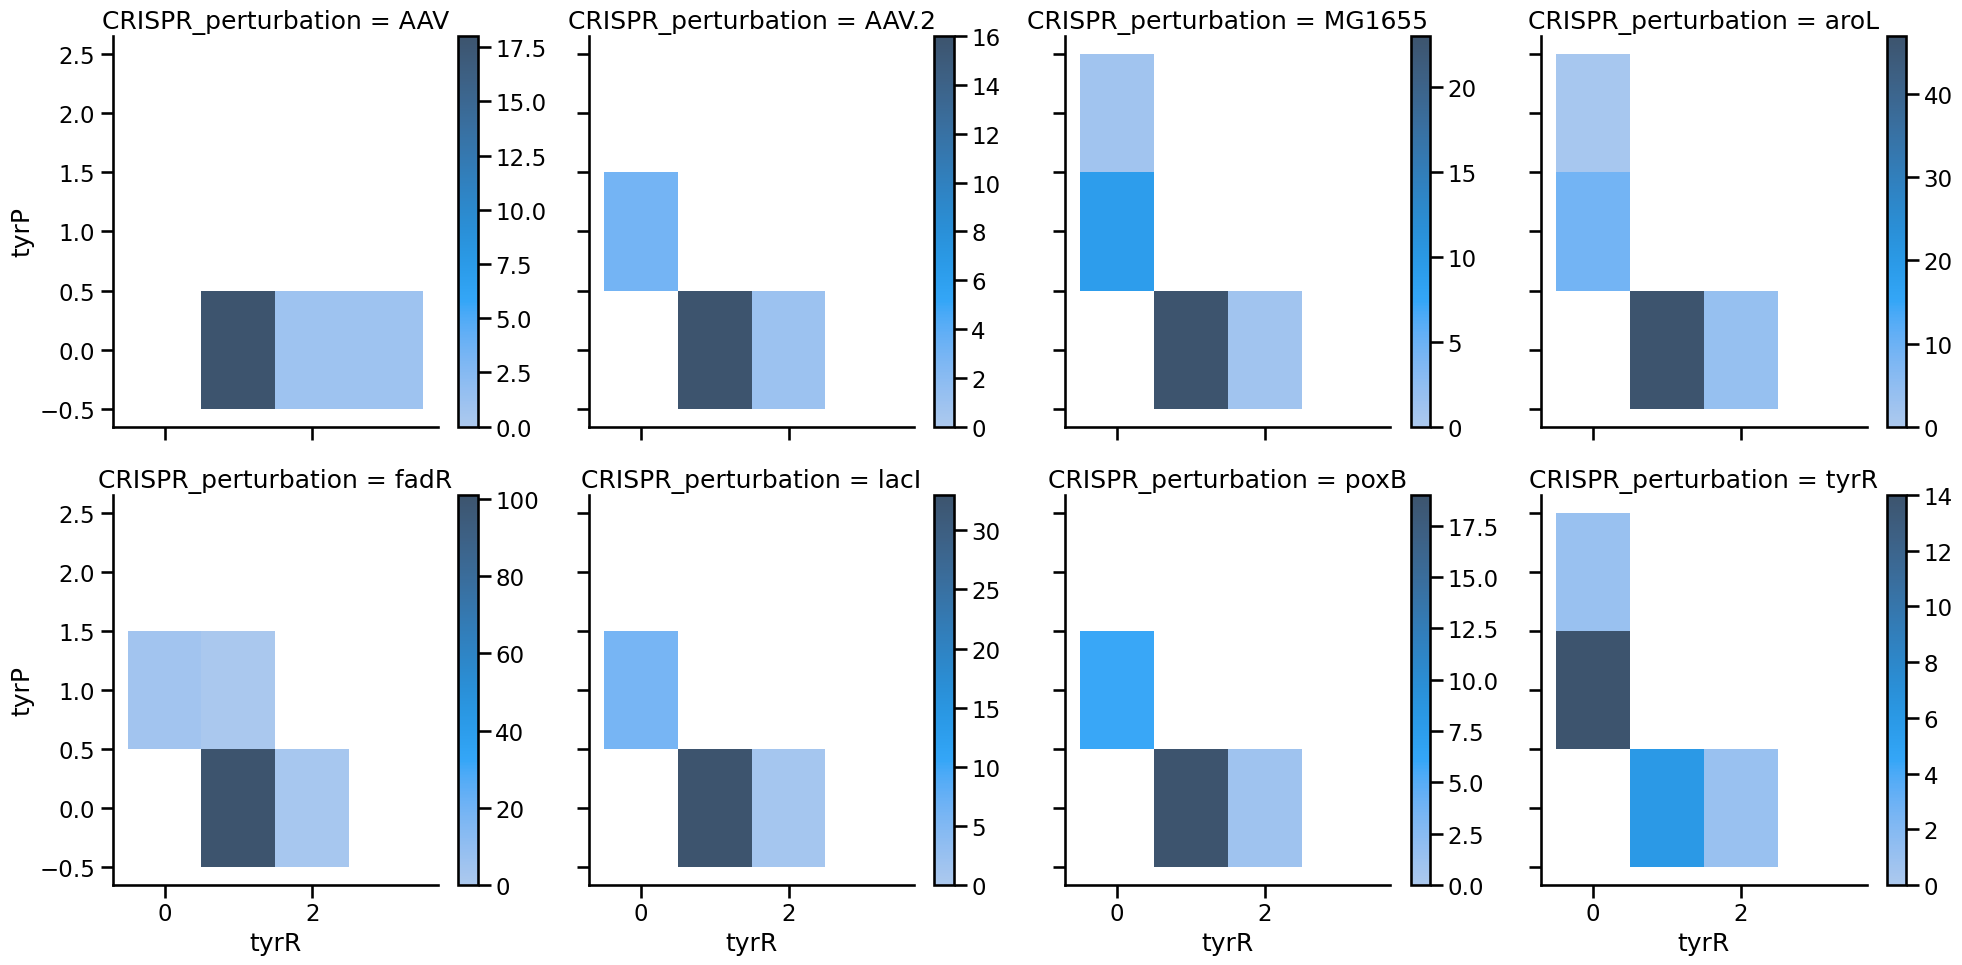

In [111]:
regulator = "tyrR"
target = "tyrP"
plot_2Dhist(df, regulator, target)